In [134]:
# Handritten number recognition using CNN training on MNIST dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten
from keras.utils import np_utils

In [3]:
df = pd.read_csv('knn.csv') # reading MNIST dataset
data = df.values

In [27]:
value = 15000
split = int(0.6*value)

X_val = (data[:value, 1:])/255
Y_val = np_utils.to_categorical(data[:value, 0])

X = X_val.reshape(X_val.shape[0],28,28,1)

x_test = data[value : value+split, 1:]/255#.reshape(28,28)
x = x_test.reshape(x_test.shape[0],28,28,1)

y_test = np_utils.to_categorical(data[value : value+split, 0])

y_test.shape

(9000, 10)

In [28]:
# creating CNN model 

model = Sequential ()

model.add (Conv2D (16, (5, 5), input_shape=(28, 28, 1)))
model.add (MaxPooling2D (pool_size = (2, 2)))
model.add (Activation ('relu'))

model.add (Conv2D (8,(3,3)))
model.add (MaxPooling2D (pool_size = (2,2)))
model.add (Activation ('relu'))

model.add(Flatten())

model.add(Dense(10))
model.add(Act ivation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
activation_10 (Activation)   (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
activation_11 (Activation)   (None, 5, 5, 8)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 200)               0         
__________

In [29]:
hist = model.fit(X, Y_val,
                epochs=50,
                shuffle=True,
                batch_size=100,
                validation_data=(x, y_test))

Train on 15000 samples, validate on 9000 samples
Epoch 1/50
15000/15000 [==============================] - 9s - loss: 1.1043 - acc: 0.6528 - val_loss: 0.4459 - val_acc: 0.8650
Epoch 2/50
15000/15000 [==============================] - 8s - loss: 0.3421 - acc: 0.8953 - val_loss: 0.2675 - val_acc: 0.9171
Epoch 3/50
15000/15000 [==============================] - 9s - loss: 0.2121 - acc: 0.9350 - val_loss: 0.1933 - val_acc: 0.9443
Epoch 4/50
15000/15000 [==============================] - 9s - loss: 0.1552 - acc: 0.9520 - val_loss: 0.1432 - val_acc: 0.9589
Epoch 5/50
15000/15000 [==============================] - 9s - loss: 0.1276 - acc: 0.9607 - val_loss: 0.1278 - val_acc: 0.9631
Epoch 6/50
15000/15000 [==============================] - 9s - loss: 0.1120 - acc: 0.9661 - val_loss: 0.1108 - val_acc: 0.9672
Epoch 7/50
15000/15000 [==============================] - 9s - loss: 0.0993 - acc: 0.9690 - val_loss: 0.1079 - val_acc: 0.9687
Epoch 8/50
15000/15000 [==============================] - 9s -

In [13]:
#dir(model.layers[1])
model.layers[1].output_shape

(None, 12, 12, 16)

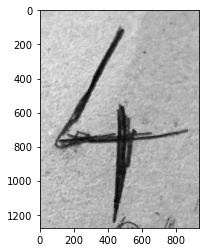

In [14]:
img = cv2.imread('test1.jpg') # reading the image to be determined 
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img = img[:,:680]
plt.imshow(img, cmap = 'gray')

(1277, 936)


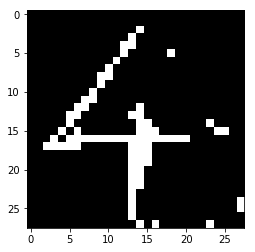

In [77]:
print (img.shape)
imag = cv2.resize(img,(28,28))
# print (imag.shape)
#imai = 255 - imag

imj = cv2.threshold(imag,109,255,cv2.THRESH_BINARY)
imaj = np.array(imj[1])
imaj = 255 - imaj
#len(imj[1])
# print (imj.shape)
plt.imshow(imaj, cmap = 'gray')

In [87]:
imai = imaj.reshape(1,28,28,1)

In [89]:
pred = model.predict(imai)
np.argmax(pred) # prints the result

4

In [31]:
model.layers[0].output_shape

(None, 24, 24, 16)

In [32]:
model.layers[0].input_shape

(None, 28, 28, 1)